### Network Analysis Use Cases
* Social media marketing strategy
* Infrastructure system design
* Financial risk amanegment
* Public health management

### Network
* A body of connected data that's evaluated during graph analysis

### Graph
* A data visualization schematic depicting the data that comprises a network

#### Network Analysis Vocabulary
* Nodes- the vericles around which a graph is formed
* Edges- the lines that connect vertices within a graph structure
* Directed graph(aka digraph)- a graph where there is a direction assigned to each edge that connects a node
* Directed edge- an edge feature that has been assigned a direction between nodes
* Undirected graph- a graph where all edges are bidirectional
* undirected edge - a bidirectional edge feature
* Graph size - the number of edges in a graph
* Graph order - the number of vertices in a graph
* Degree- the number of edges connected to a vertex, with loops counted twice

### Types of Graph Generators
* Graph drawing algoriths
* Network analysis algorithms
* Algorithmic routing for graphs
* Graph search algorithms
* Subgraph algorithms

In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams

import networkx as nx

In [14]:
%matplotlib inline
rcParams['figure.figsize']=7,4
plt.style.use("seaborn-whitegrid")

### Creating graph object

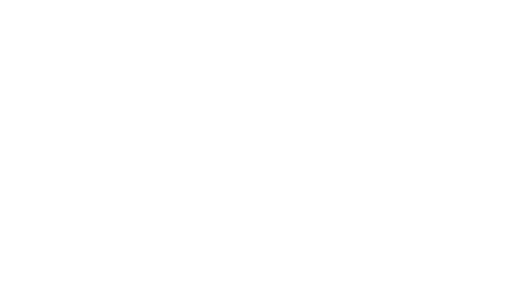

In [26]:
G = nx.Graph()
nx.draw(G)

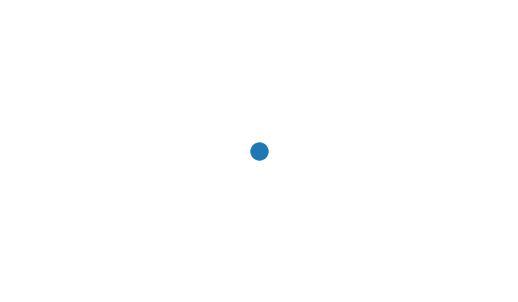

In [4]:
G.add_node(1)
nx.draw(G)

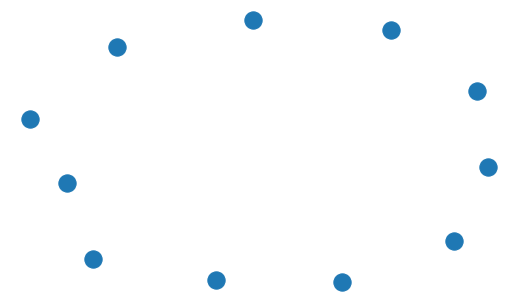

In [5]:
G.add_nodes_from([2,3,4,5,6,8,9,12,15,16])
nx.draw(G)

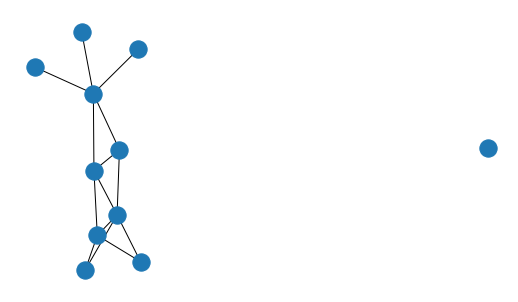

In [6]:
G.add_edges_from([(2,4),(2,6),(2,8),(2,12),(2,16),(3,6),(3,5),(3,9),(3,12),(3,15),(4,8),(4,12),(4,16),(6,12)])
nx.draw(G)

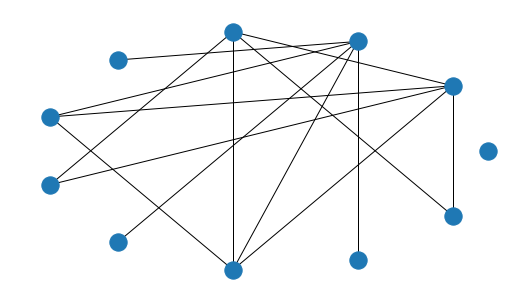

In [7]:
nx.draw_circular(G)

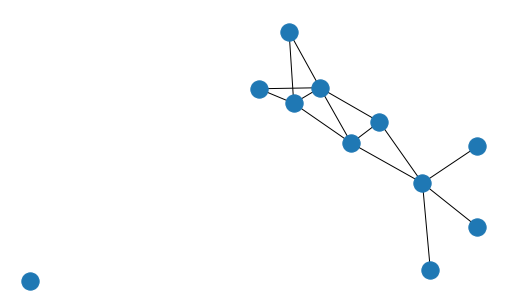

In [8]:
nx.draw_spring(G)

#### Labeling and coloring your graph plots

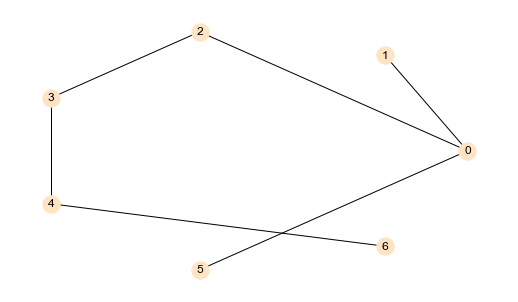

In [102]:
nx.draw_circular(G, node_color="bisque", with_labels=10)

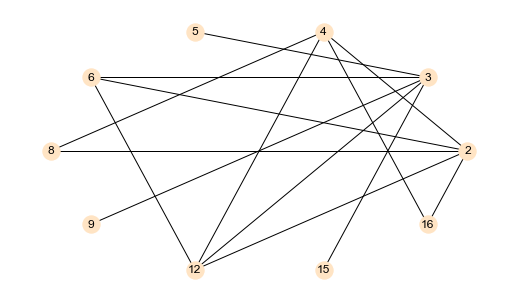

In [10]:
G.remove_node(1)
nx.draw_circular(G, node_color="bisque", with_labels=True)

### Identifying graph properties

In [13]:
sum_stat = nx.info(G)
print(sum_stat)

Graph with 10 nodes and 14 edges


In [12]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
print(nx.degree(G))

[(2, 5), (3, 5), (4, 4), (5, 1), (6, 3), (8, 2), (9, 1), (12, 4), (15, 1), (16, 2)]


### Using graph generators

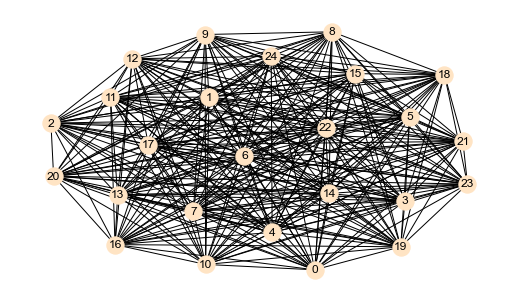

In [103]:
G = nx.complete_graph(25)
nx.draw(G, node_color="bisque", with_labels=True)

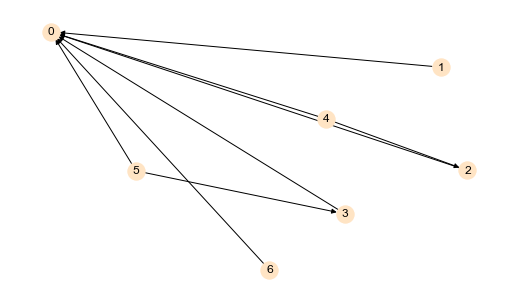

In [16]:
G = nx.gnc_graph(7, seed=25)
nx.draw(G, node_color="bisque", with_labels=True)

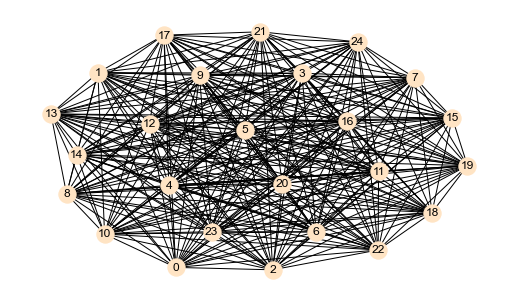

In [110]:
ego_G = nx.ego_graph(G, 3, radius=5)
nx.draw(ego_G, node_color="bisque", with_labels=True)

### Simulating a Social Network
#### Three easy steps
* Generate graph object and edge list 
* Assign attributes to graph nodes
* Visualize the network


In [67]:
DG = nx.gn_graph(7, seed=25)
for line in nx.generate_edgelist(DG, data=False): print(line)

1 0
2 0
3 2
4 3
5 0
6 4


### Assigning attributes to nodes

In [68]:
DG.graph

{}

In [69]:
print(DG.to_undirected())

Graph with 7 nodes and 6 edges


In [70]:
DG.nodes[0]['name'] = "Alice"


In [71]:
DG.nodes[5]

{}

In [72]:
DG.nodes[1]['name'] ="Bob"
DG.nodes[2]['name'] ="Claire"
DG.nodes[3]['name'] ="Dennis"
DG.nodes[4]['name'] ="Esther"
DG.nodes[5]['name'] ="Frank"
DG.nodes[6]['name'] ="George"

In [73]:
DG.add_nodes_from([(0,{'age':25}),(1,{'age':31}),(2,{'age':18}),( 3,{"age":47}),(4,{"age":22}),(5,{'age':23}),(6,{'age':50})])
DG[0]

AtlasView({})

In [74]:
DG.nodes[0]["gender"]="f"
DG.nodes[1]["gender"]="m"
DG.nodes[2]["gender"]="f"
DG.nodes[3]["gender"]="m"
DG.nodes[4]["gender"]="f"
DG.nodes[5]["gender"]="m"
DG.nodes[6]["gender"]="m"

### Visualize your network graph

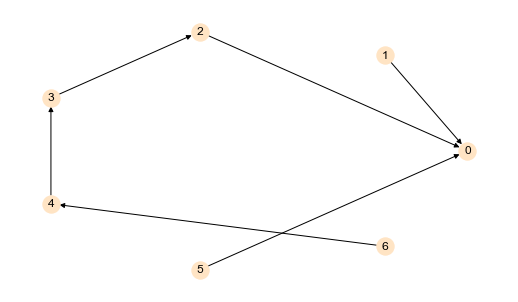

In [75]:
nx.draw_circular(DG,node_color="bisque", with_labels=True)

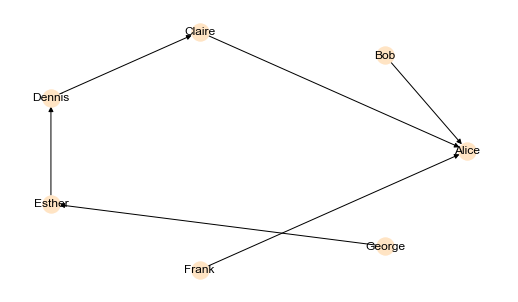

In [76]:
labeldict = {0: "Alice", 1:"Bob", 2:"Claire", 3:"Dennis",  4:"Esther", 5:"Frank", 6 :"George"}
nx.draw_circular(DG, labels=labeldict, node_color="bisque")

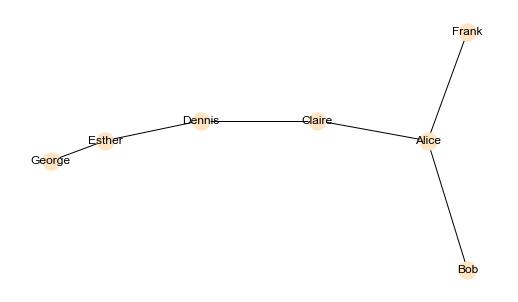

In [77]:
G = DG.to_undirected()
nx.draw_spectral(G, labels=labeldict, node_color="bisque", with_labels=True)

### Social Network Analysis Metrics
- Degree: Degree describes a node's connectedness

* Successors: A Successor node is a node that could serve as backup and potentially replace an influential node in a network. The function of a successor node is to preserve the flow of influence throughout a network in the case where an important node is removed.

* Neighbors: Neighbors are adjacent nodes in a network

###### Considering Degress in a Social Network
* In-degree: The theory is that if a person or profile has a lot of inbound connections, then they're considered prestigious, because many different people and profiles want to connect with them.

* Out-degree: If a person or profile has a lot of outgoing connections, howevwe, then they're sometimes considered influential. That's because, in theory, these people have more of a platform across which to engage and interact with their many outbound connections.

In [79]:
import warnings
warnings.filterwarnings("ignore")

In [80]:
G = DG.to_undirected()
nx.info(DG)

'DiGraph with 7 nodes and 6 edges'

###  Considering degrees in Social Network

In [81]:
DG.degree()

DiDegreeView({0: 3, 1: 1, 2: 2, 3: 2, 4: 2, 5: 1, 6: 1})

### Identifying Successor Nodes

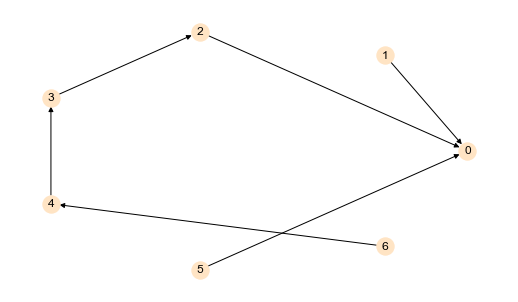

In [82]:
nx.draw_circular(DG, node_color="bisque", with_labels=True)

In [83]:
for x in DG.nodes:
    succ = [x for x in DG.successors(x)]
    print(succ)

[]
[0]
[0]
[2]
[3]
[0]
[4]


In [84]:
for n in G.nodes:
    neighbor_lis = [n for n in G.neighbors(4)]
    print(neighbor_lis)

[3, 6]
[3, 6]
[3, 6]
[3, 6]
[3, 6]
[3, 6]
[3, 6]


In [85]:
for n in DG.nodes:
    neighbor_lis = [n for n in DG.neighbors(4)]
    print(neighbor_lis)

[3]
[3]
[3]
[3]
[3]
[3]
[3]


In [111]:
X = nx.Graph()

In [112]:
X.graph["id"] = "my Graph" 

In [113]:
X.add_nodes_from([
    ("A",{"age": 19, "Gender":"F"}),
    ("B",{"Age": 18, "Gender": "M"}),
    ("C",{"Age": 22, "Gender": "F"}),
    ("D",{"Age": 21, "Gender":"F"}),
    ("E", {"Age": 20, "Gender":"M"})
])

In [116]:
X.add_edges_from([
    ("A","C",{"weight":1}),
    ("B","C", {"weight":0.5}),
    ("B","D", {"weight":0.6}),
    ("C", "D", {"weight":0.8}),
    ("D", "E", {"weight": 2})
])

In [57]:
pos = {"A": (1,5),
       "B": (4.5, 6.6), 
       "C": (3.6, 1.4),
       "D": (5.8, 3.5),
       "E": (7.9,3.6)}

In [44]:
from turtle import Turtle

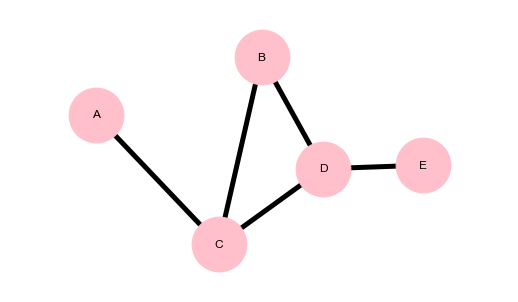

In [108]:
nx.draw(X, pos=pos, with_labels=True, node_color="pink", 
       node_size=3000, font_color="black", font_family="Arial",
       width=5)
plt.margins(0.2)
plt.show()

In [60]:
print(X.number_of_nodes())

5


In [61]:
print(X.number_of_edges())

5


In [50]:
t=Turtle()
for step in range(36):
    t.forward(400)
    t.right(250)

In [62]:
print(X.degree())

[('A', 1), ('B', 2), ('C', 3), ('D', 3), ('E', 1)]


In [117]:
for node in X.nodes(data=True):
    print(f"Degree: ({node})......... {X.degree()}")

Degree: (('A', {'age': 19, 'Gender': 'F'}))......... [('A', 1), ('B', 2), ('C', 3), ('D', 3), ('E', 1)]
Degree: (('B', {'Age': 18, 'Gender': 'M'}))......... [('A', 1), ('B', 2), ('C', 3), ('D', 3), ('E', 1)]
Degree: (('C', {'Age': 22, 'Gender': 'F'}))......... [('A', 1), ('B', 2), ('C', 3), ('D', 3), ('E', 1)]
Degree: (('D', {'Age': 21, 'Gender': 'F'}))......... [('A', 1), ('B', 2), ('C', 3), ('D', 3), ('E', 1)]
Degree: (('E', {'Age': 20, 'Gender': 'M'}))......... [('A', 1), ('B', 2), ('C', 3), ('D', 3), ('E', 1)]


In [95]:
for n in X.nodes:
    neighbor_list = [n for n in X.neighbors(n)]
    print(neighbor_list)
print(X.neighbors(n))

['C']
['C', 'D']
['A', 'B', 'D']
['B', 'C', 'E']
['D']


In [110]:
X.degree()

DegreeView({'A': 1, 'B': 2, 'C': 3, 'D': 3, 'E': 1})

In [3]:
data = pd.read_csv('supermarkets.csv')

In [4]:
data

,ID,Address,City,State,Country,Name,Employees
0,1,3666 21st St,San Francisco,CA 94114,USA,Madeira,8
1,2,735 Dolores St,San Francisco,CA 94119,USA,Bready Shop,15
2,3,332 Hill St,San Francisco,California 94114,USA,Super River,25
3,4,3995 23rd St,San Francisco,CA 94114,USA,Ben's Shop,10
4,5,1056 Sanchez St,San Francisco,California,USA,Sanchez,12
5,6,551 Alvarado St,San Francisco,CA 94114,USA,Richvalley,20


In [94]:
n = nx.Graph()

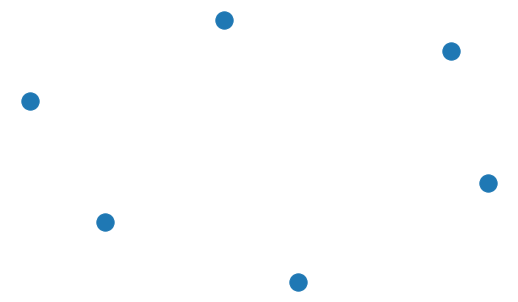

In [95]:
n.add_nodes_from(data['Employees'])
nx.draw(n)

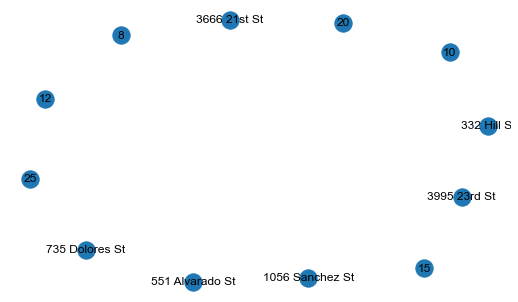

In [96]:
n.add_nodes_from(data['Address'])
nx.draw_spring(n, with_labels=True)

In [108]:
n.degree()

DegreeView({8: 0, 15: 0, 25: 0, 10: 0, 12: 0, 20: 0, '3666 21st St': 0, '735 Dolores St': 0, '332 Hill St': 0, '3995 23rd St': 0, '1056 Sanchez St': 0, '551 Alvarado St': 0, 'CA 94114': 0, 'CA 94119': 0, 'California 94114': 0, 'California': 0})